# Introduction to CNN and Computer vision with TF

### Getting the data

In [17]:
%ls ..\data\pizza_steak\train\steak

 Volume in drive E is Others
 Volume Serial Number is 4EBF-4A29

 Directory of e:\Studies\Github\deep-learning\data\pizza_steak\train\steak

12/14/2025  08:36 PM    <DIR>          .
12/14/2025  08:36 PM    <DIR>          ..
09/20/2019  10:06 PM            36,185 1000205.jpg
09/20/2019  10:06 PM            34,497 100135.jpg
09/20/2019  10:06 PM           116,802 101312.jpg
09/20/2019  10:06 PM            56,754 1021458.jpg
09/20/2019  10:06 PM            34,143 1032846.jpg
09/20/2019  10:06 PM            24,688 10380.jpg
09/20/2019  10:06 PM            37,134 1049459.jpg
09/20/2019  10:06 PM            49,841 1053665.jpg
09/20/2019  10:06 PM            59,983 1068516.jpg
09/20/2019  10:06 PM            28,996 1068975.jpg
09/20/2019  10:06 PM            29,525 1081258.jpg
09/20/2019  10:06 PM            49,577 1090122.jpg
09/20/2019  10:06 PM            59,976 1093966.jpg
09/20/2019  10:06 PM            60,253 1098844.jpg
09/20/2019  10:06 PM            69,843 1100074.jpg
09/20/2019  10:

In [18]:
import os

# Walk through the pizza_steak directory and list number of files.
for dirpath, dirnames, filenames in os.walk("..\data\pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '..\data\pizza_steak'.
There are 2 directories and 0 images in '..\data\pizza_steak\test'.
There are 0 directories and 250 images in '..\data\pizza_steak\test\pizza'.
There are 0 directories and 250 images in '..\data\pizza_steak\test\steak'.
There are 2 directories and 0 images in '..\data\pizza_steak\train'.
There are 0 directories and 750 images in '..\data\pizza_steak\train\pizza'.
There are 0 directories and 750 images in '..\data\pizza_steak\train\steak'.


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MSI\AppData\Local\Temp\ipykernel_23440\2881255389.py:4: SyntaxWarning: invalid escape sequence '\d'
  for dirpath, dirnames, filenames in os.walk("..\data\pizza_steak"):


In [21]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("../data/pizza_steak/train/steak"))
num_steak_images_train

750

In [22]:
num_pizza_images_train = len(os.listdir("../data/pizza_steak/train/pizza"))
num_pizza_images_train

750

In [23]:
# To visualize our images, first let's get the class names programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("../data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories.
print(class_names)

['pizza' 'steak']


In [25]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1) # randomly sample one of the items from target_folder

    img = mpimg.imread(target_folder + "/" + random_image[0]) # It will come as a list so we give [0]
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


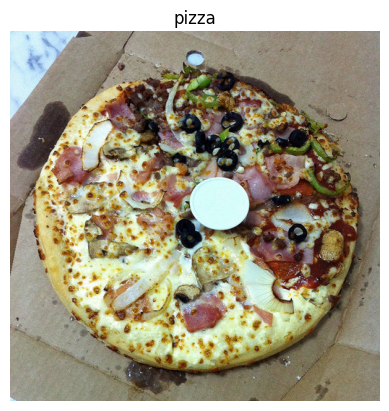

In [37]:
# View a random image from the training data-set
img = view_random_image(target_dir="../data/pizza_steak/train/",
                        target_class="pizza")

### An end to end example of CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess the data(get all of the pixel values between 0 & 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "../data/pizza_steak/train"
test_dir = "../data/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42) # Takes the path to a directory and generates batches of augmented data

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="bianry",
                                               seed=42)

# Build a CNN model ( same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    
])